<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>


# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


You will require the following libraries:


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [26]:
# !pip install seaborn

# Module 1: Importing Data Sets


Load the csv:


In [41]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [42]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [44]:
df.rename(columns={'id':'Ident'})

,Unnamed: 0,Ident,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# normalizing the data


In [45]:
dfnorm = df.copy()
dfnorm['price']=dfnorm['price']/dfnorm['price'].max() 
dfnorm.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,0.028818,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,0.069870,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,0.023377,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,0.078442,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,0.066234,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,0.159091,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,0.033442,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,0.037903,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,0.029805,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,0.041948,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### normalizing with min max

In [48]:
dfnorm1=df.copy()
dfnorm1['price']=(dfnorm1['price']-dfnorm1['price'].min())/(dfnorm1['price'].max()-dfnorm1['price'].min())
dfnorm1.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,0.019266,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,0.060721,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,0.013770,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,0.069377,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,0.057049,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,0.150820,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,0.023934,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,0.028439,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,0.020262,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,0.032525,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### normalizing with z-score: or standardizing: if the data follows the gaussian distribution

In [50]:
dfnorm2=df.copy()
dfnorm2['price']=(dfnorm2['price']-dfnorm2['price'].mean())/dfnorm2['price'].std()
dfnorm2.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,-0.866697,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,-0.005688,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,-0.980827,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,0.174086,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,-0.081956,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1.865598,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,-0.769728,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,-0.676164,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,-0.845996,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,-0.591316,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# checking the type of data and changing the types of the data

In [80]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df4=df['id'].astype('object') #try object,float64,int64

In [7]:
df4.dtypes

dtype('O')

In [50]:
s = pd.Series(['1.0', '2', -3])
s

0    1.0
1      2
2     -3
dtype: object

In [51]:
pd.to_numeric(s)

0    1.0
1    2.0
2   -3.0
dtype: float64

In [52]:
s1=s.astype('float64')
s1

0    1.0
1    2.0
2   -3.0
dtype: float64

# other 

In [8]:
#houses with number of bedrooms higher than 2
df[df['bedrooms']>2]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,21606,7936000429,20150326T000000,1007500.0,4.0,3.50,3510,7200,2.0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [21]:
df['bedrooms'].describe()

count    21600.000000
mean         3.372870
std          0.926657
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

# loc vs iloc: if you try to access data at an index and the data is missing, use iloc

#### df.loc: Access a group of rows and columns by label(s) or a boolean array.
#### df.iloc:Purely integer-location based indexing for selection by position.

Df10['location'].index
I got the following output: Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,
               10,
### Note that index 7 is missing
When i was building my model, some of the price indexes were not there 
For example index 7 was not there, so if i try to access the index regularly , it will not work.
So I used df10['location'].iloc[7]


In [84]:
df['bedrooms'].index

RangeIndex(start=0, stop=21613, step=1)

In [82]:
df['bedrooms'].iloc[30] #returns the value at index 30

3.0

In [14]:
df['bedrooms'].loc[30]

3.0

In [53]:
dft = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])

In [54]:
dft.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [56]:
dft.iloc[1]

max_speed    4
shield       5
Name: viper, dtype: int64

In [16]:
df.bedrooms.describe() # you can use . instead of []

count    21600.000000
mean         3.372870
std          0.926657
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

# to save new dataframe to csv

In [ ]:
df.to_csv("a.csv",index=False)

# math operations

In [58]:
s = pd.Series(range(5))
s.where(s > 2)

0    NaN
1    NaN
2    NaN
3    3.0
4    4.0
dtype: float64

In [60]:
df = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
df

,angles,degrees
circle,0,360
triangle,3,180
rectangle,4,360


In [61]:
df + 1

,angles,degrees
circle,1,361
triangle,4,181
rectangle,5,361


In [62]:
df.add(1)

,angles,degrees
circle,1,361
triangle,4,181
rectangle,5,361


In [63]:
df.div(10)

,angles,degrees
circle,0.0,36.0
triangle,0.3,18.0
rectangle,0.4,36.0


In [67]:
df

,angles,degrees
circle,0,360
triangle,3,180
rectangle,4,360


In [65]:
other = pd.DataFrame({'angles': [0, 3, 4]},
                     index=['circle', 'triangle', 'rectangle'])
other

,angles
circle,0
triangle,3
rectangle,4


In [66]:
df * other

,angles,degrees
circle,0,NaN
triangle,9,NaN
rectangle,16,NaN


In [68]:
df.mul(other, fill_value=0)

,angles,degrees
circle,0,0.0
triangle,9,0.0
rectangle,16,0.0


In [69]:
s = pd.Series([2, np.nan, 5, -1, 0])
s

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [70]:
#Return cumulative sum over a DataFrame or Series axis.
s.cumsum()

0    2.0
1    NaN
2    7.0
3    6.0
4    6.0
dtype: float64

In [72]:
df = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
s = pd.Series([1, 1, 2, 1])
df.dot(s)

0   -4
1    5
dtype: int64

# plotting

Text(0, 0.5, 'count')

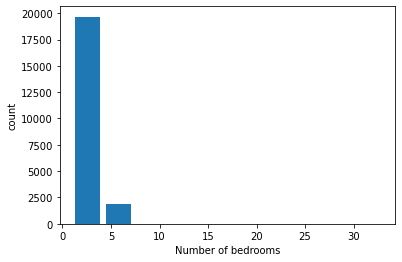

In [19]:
plt.hist(df.bedrooms,rwidth=0.8)
plt.xlabel("Number of bedrooms")
plt.ylabel("count")

Text(0.5, 0, 'bedrooms')

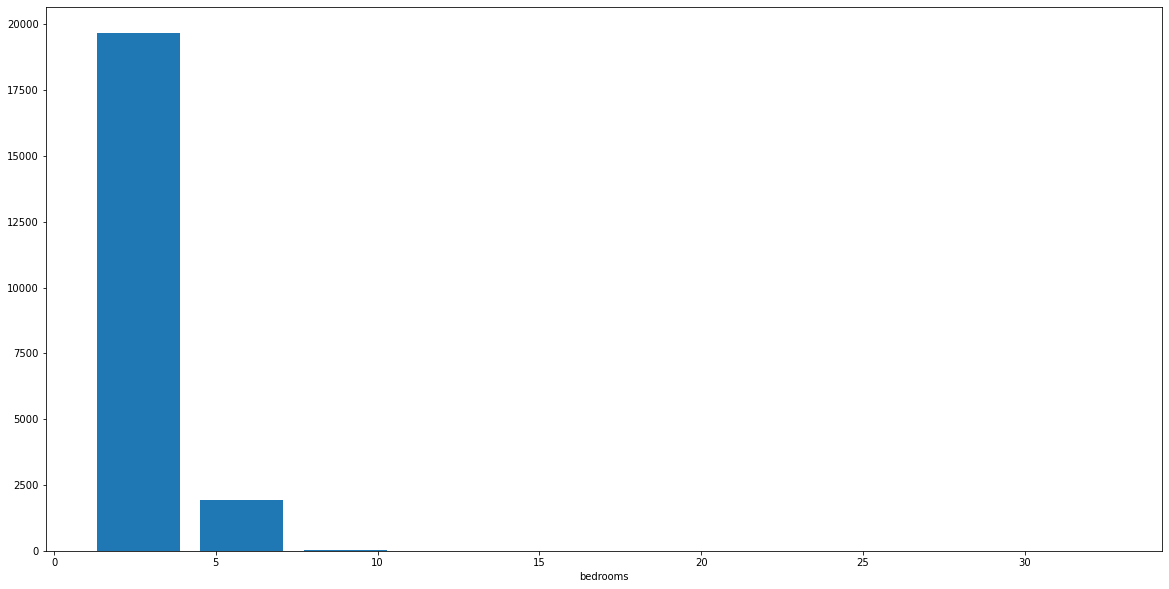

In [25]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.bedrooms,rwidth=0.8)
plt.xlabel("bedrooms")


Text(0, 0.5, 'Count')

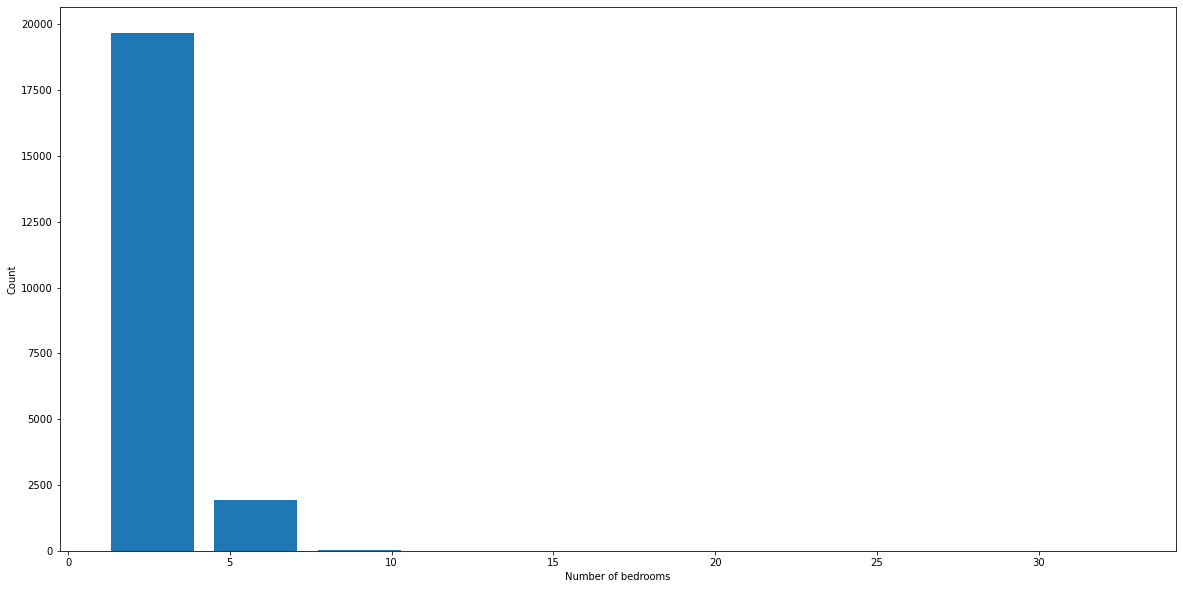

In [26]:
plt.hist(df.bedrooms,rwidth=0.8)
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

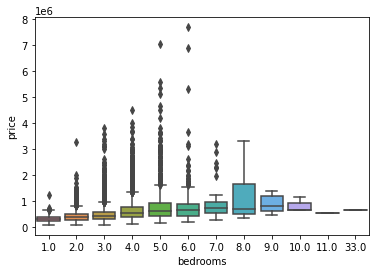

In [51]:
sns.boxplot(x='bedrooms',y='price',data=df)

Text(0, 0.5, 'price')

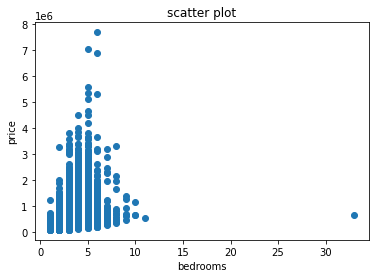

In [52]:
x=df['bedrooms']
y=df['price']
plt.scatter(x,y)
plt.title('scatter plot')
plt.xlabel('bedrooms')
plt.ylabel('price')

In [58]:
# df_g = df[['bedrooms','price']]
# df_g = df_g.fillna(0)
# df_pivot= df_g.pivot(index='bedrooms',columns='price')
# plt.pcolor(df_pivot,cmap="RdBu")
# plt.colorbar() 
# plt.show

# dummies

In [29]:
dummies = pd.get_dummies(df.bedrooms)
dummies

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,33.0
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,1,0,0,0,0,0,0,0,0,0
21609,0,0,0,1,0,0,0,0,0,0,0,0
21610,0,1,0,0,0,0,0,0,0,0,0,0
21611,0,0,1,0,0,0,0,0,0,0,0,0


# not null operators

In [21]:
df[df.bedrooms.notnull()].head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [22]:
df.bedrooms.shape

(21613,)

# lambda to add filters: note: it will not work without else

In [28]:
df['bedrooms'].apply(lambda x: x if x>2 else 0)

0        3.0
1        3.0
2        0.0
3        4.0
4        3.0
        ... 
21608    3.0
21609    4.0
21610    0.0
21611    3.0
21612    0.0
Name: bedrooms, Length: 21613, dtype: float64

In [82]:
df[~df['bedrooms'].apply(is_float)].head() # but we don't have this funct, it is just an example

NameError: name 'is_float' is not defined

In [83]:
df['bedrooms']=df['bedrooms'].apply(lambda x:x.strip()) #strip removes the space, none here so just example

AttributeError: 'float' object has no attribute 'strip'

# to check the number of data for each values

In [29]:
df['bedrooms'].value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

In [32]:
# returns the number of possible values
df['bedrooms'].value_counts().agg('count')

12

In [33]:
#cleaner way to show how many data for each possible values
df.groupby('bedrooms')['bedrooms'].agg('count')

bedrooms
1.0      199
2.0     2760
3.0     9824
4.0     6882
5.0     1601
6.0      272
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

In [121]:
df2 = df.drop(['Unnamed: 0','id','date'],axis=1)

In [122]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [125]:
grade = df.groupby('grade')['grade'].agg('count').sort_values(ascending=False) #
grade #organize them by grade parameter in descending order, for ascending change it to true

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [126]:
len(df[df['grade']>7])

10319

In [132]:
len(df[~df['grade']<7])

21613

In [129]:
len(df['grade'])

21613

# concat

In [33]:
series1= pd.Series([1,2,3])

In [35]:
series2= pd.Series(['A','B','C'])

In [36]:
display(pd.concat([series1,series2]))

0    1
1    2
2    3
0    A
1    B
2    C
dtype: object

In [39]:
series3 = pd.concat([series1,series2])
series3

0    1
1    2
2    3
0    A
1    B
2    C
dtype: object

In [73]:
series4 = pd.concat([series1,series2],axis=1)
series4

,0,1
0,1,A
1,2,B
2,3,C


In [74]:
series5 = pd.concat([series1,series2],axis=0)
series5

0    1
1    2
2    3
0    A
1    B
2    C
dtype: object

##### Clear the existing index and reset it in the result by setting the ignore_index option to True.

In [42]:
a=pd.concat([series1, series2], ignore_index=True)
a

0    1
1    2
2    3
3    A
4    B
5    C
dtype: object

In [43]:
a[4]

'B'

In [45]:
b=pd.concat([series1, series2], keys=['s1', 's2'])
b

s1  0    1
    1    2
    2    3
s2  0    A
    1    B
    2    C
dtype: object

In [46]:
b[4]

'B'

# checking for empty or null values

In [44]:
df.isnull()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [46]:
df3 = df.dropna() # to remove na or null values
df3.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [67]:
df3['floors'].unique() #unique values for floors

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

# splitting the data

In [75]:
df3['date']=df3['date'].apply(lambda x: x.split('T')[0]) # it will split to two parts but we only want the first part
df3.head()

/tmp/ipykernel_30240/2381221205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date']=df3['date'].apply(lambda x: x.split('T')[0])


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# copying the dataframe

In [77]:
df5= df3.copy()
df5.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [60]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [61]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>


In [62]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [13]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [14]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [15]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [16]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [24]:
df['floors'].value_counts().to_frame()


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

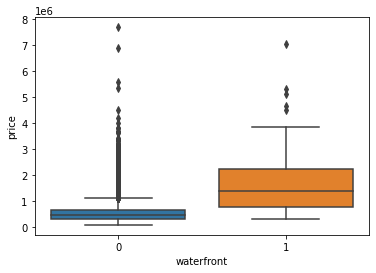

In [25]:
sns.boxplot(x='waterfront',y='price',data=df)

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

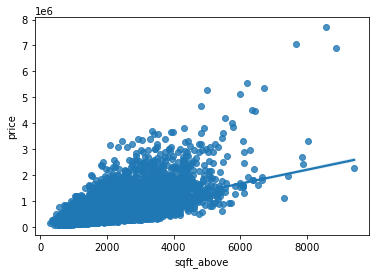

In [26]:
sns.regplot(x='sqft_above',y='price',data=df)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [27]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [28]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.


In [30]:
x=df[['sqft_living']]
y=df['price']
lm=LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.4928532179037931

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [32]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code.


In [39]:
x1=df[features]
lm=LinearRegression()
lm.fit(x1,y)
lm.score(x1,y)

0.6576722447699446

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [40]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [42]:
pipeline1 = Pipeline(Input)
pipeline1
pipeline1.fit(X,Y)
pipeline1.score(X,Y)

0.003360798516638175

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [44]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [45]:
from sklearn.linear_model import Ridge

In [47]:
Ridge1 = Ridge(alpha=0.1)
Ridge1.fit(x_train,y_train)
Ridge1.score(x_test,y_test)

0.6478759163939112

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [49]:
poly1= PolynomialFeatures(degree=2)
x_train_poly1=poly1.fit_transform(x_train[features])
x_test_poly1=poly1.fit_transform(x_test[features])

Ridge1 = Ridge(alpha=0.1)
Ridge1.fit(x_train_poly1,y_train)
Ridge1.score(x_test_poly1,y_test)

0.700274426790608

<p>Once you complete your notebook you will have to share it. Select the icon on the top right a marked in red in the image below, a dialogue box should open, and select the option all&nbsp;content excluding sensitive code cells.</p>
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/share_notebook.png" alt="share notebook"  style="display: block; margin-left: auto; margin-right: auto;"/></p>
        <p></p>
        <p>You can then share the notebook&nbsp; via a&nbsp; URL by scrolling down as shown in the following image:</p>
        <p style="text-align: center;"><img width="600"  src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/url_notebook.png" alt="HTML" style="display: block; margin-left: auto; margin-right: auto;" /></p>
        <p>&nbsp;</p>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
